## Copyright Note


**This lecture main examples and figures are adapted from wiki and internet:

#### [Link 1](https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285)

#### [Link 2](https://medium.com/@apargarg99/co-occurrence-matrix-singular-value-decomposition-svd-31b3d3deb305)

### [Link 3](https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/)

### [Link 4](https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/)
 





# Revision (NN main concepts):

1. What is the main difference between NN and DL architecture?
2. How do we design the NN input and output layers?-- For example, what are the charactersitics of their paramters.
3. What are the parameters of NN and how does NN acquire the parameters?
4. Decribe difference(s) between fully-connected NN,CNN, and RNN architectures!
5. Describe how batch normalization works and how its parameters are calculated?
6. Give examples for underfitting and overfitting situations.   

## Learning concepts:

1. Natural Language Processing:(Deep Learning Architecture)
   - [Sentiment Analysis:](https://en.wikipedia.org/wiki/Sentiment_analysis) Needs to identify emotions and opinions:
     -   Example: This book is good; but, it has a lot of useless details.
   - [Named Entity Recognition:](https://en.wikipedia.org/wiki/Named-entity_recognition) Need to recognize the famous names like places, persons, countries, currencies, and dates:
     -  Washington park.
   - Contexts: words in contexts may give different meanings.    


 2. N-grams and context methods' applications: (NLP/biology (DNA/Gene Expressions).

 3. Illustrations and Implementations of prediction based methods  

## Prediction based methods 
### Pre-trained word embeddings — Word2Vec, GloVe, BERT, fastText

## [Word2Vec:](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa)
Word2Vec is a method to construct such an embedding. It can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW).

The example and ilustration with algorithms are from [link](https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285)

 “The cat jumped over the puddle.”

Usually the **Cross Entropy as the loss function**

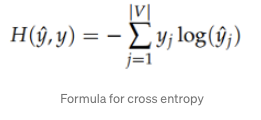


## [Continuous Bag of Words(CBOW):](https://thinkinfi.com/continuous-bag-of-words-cbow-single-word-model-how-it-works/)

**CBOW** is learning to predict the word by the context. A context may be single word or multiple word for a given target words.

In the above example, treat {“The”, “cat”, ’over”, “the’, “puddle”} as a context and from these words, be able to predict or generate the center word “jumped”. 

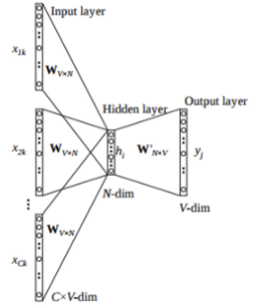



## [Skip-gram model:](https://thinkinfi.com/word2vec-skip-gram-explained/#:~:text=If%20you%20keep%20data%20pre-processing%20separate%20then%20it,%E2%80%94%20Continuous%20Bag-Of-Words%20%28CBOW%29%20and%20continuous%20Skip-gram%20%28SG%29.)

A model such that given the center word “jumped”, the model will be able to predict or generate the surrounding words “The”, “cat”, “over”, “the”, “puddle”. Here we call the word “jumped” the context. We call this type of model a SkipGram model.
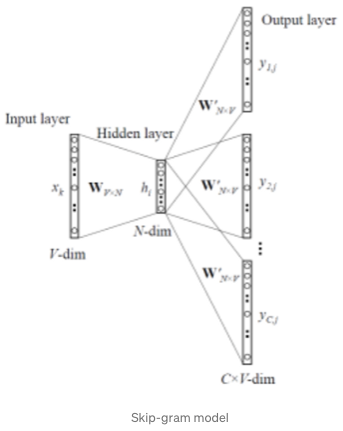


# Watch the [video](https://www.youtube.com/watch?v=UqRCEmrv1gQ)

The results of these models:

- The similarity between two words.
- Likelihood of the contexts and words to be co-occured with each other. 

# [Example](https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/)

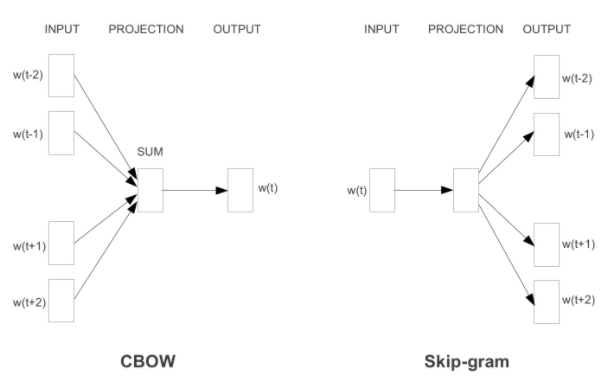

## [**CBOW Illustration and implementation**](https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/)

As an example, lets encode the following sentence: "the quick brown fox jumps over the lazy dog" using a window size of C=5 (two before, and two after the center word). As the context window slides across the sentence from left to right, it gets populated with the corresponding words. When the context window reaches the edges of the sentences, it simply drops the furthest window positions. Below is what this process looks like. Note that instead of w(t), w(t+1), etc., the center word has become xk and the context words have become yc.

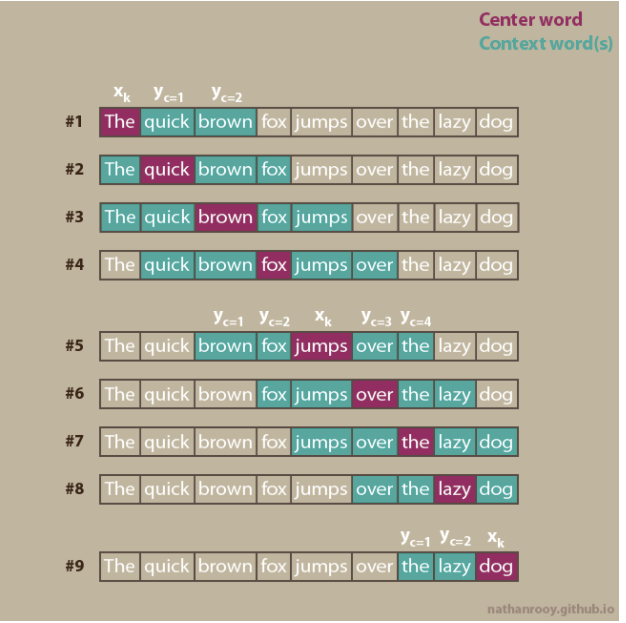

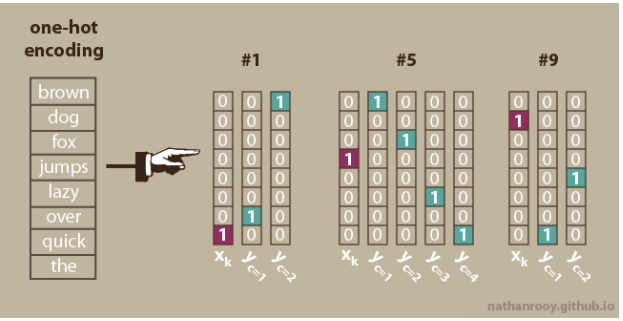

# Snapshot of results:

If we narrow in on the word lazy, we can see that the probabilities for the words dog, over, and the are split fairly evenly at roughly 33.33% each. This is exactly what we want.

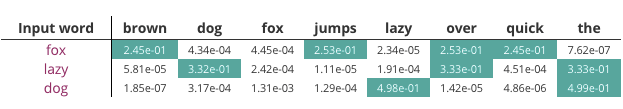


## **[Continuous Skip-gram Model with implementation and illustration](https://www.tensorflow.org/tutorials/text/word2vec)** 


Example: "The wide road shimmered in the hot sun."

The context words for each of the 8 words of this sentence are defined by a window size. The window size determines the span of words on either side of a target_word that can be considered context word. Take a look at this table of skip-grams for target words based on different window sizes.


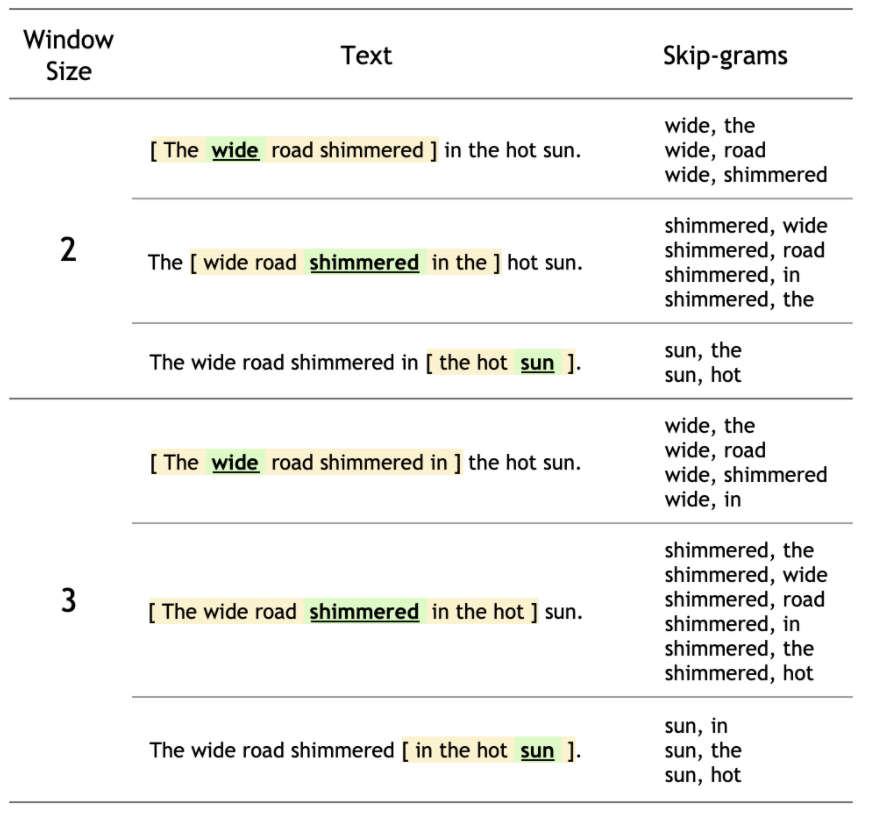

# [Simple Code Example](https://www.jasonosajima.com/word2vec.html)

In [ ]:
document1 = ["the", "cat", "loves", "fish"]
document2 = ["the", "person", "hates", "fish"]
corpus = [document1, document2]

In [ ]:
def corpus_to_vocab(corpus):
    """
    Takes a corpus (list of documents) and converts
    it to two dictionaries:
      - word_to_ix: key are words in vocab, values
        are the unique indices
      - ix_to_word: key are the unique indices,
        values are the words in vocab
    """
    word_to_ix, ix_to_word = {}, {}
    ix = 0
    for document in corpus:
        for word in document:
            if word not in word_to_ix.keys():
                word_to_ix[word], ix_to_word[ix] = ix, word
                ix += 1
    return word_to_ix, ix_to_word

EMBEDDING_DIM = 3 # We have 3 distinct words in the training set  

document1 = ["the", "cat", "loves", "fish"]
document2 = ["the", "person", "hates", "fish"]
corpus = [document1, document2]

# vocab
word_to_ix, ix_to_word = corpus_to_vocab(corpus)

In [ ]:
word_to_ix

In [ ]:
ix_to_word

## Continuous Bag of Words (CBOW)

The first step for implementing CBOW is to instantiate the embedding matrix described above. Let's create an embedding matrix for the words in our vocab using tensorflow.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# [Embedding Layer](https://keras.io/api/layers/core_layers/embedding/)

In [ ]:
N_WORDS = len(word_to_ix.keys())
embedding_layer = layers.Embedding(N_WORDS, EMBEDDING_DIM, 
                                   embeddings_initializer="RandomNormal",
                                   input_shape=(2,))
#An input shape of (2,) is that for each target word.So if we wanted to pass in "the" and "loves", we would pass in the vector [0,2].

In [ ]:
print(N_WORDS)

In [ ]:
embedding_layer(4)

In [ ]:
train_set = []
for document in corpus:
    for i in range(1, len(document)-1):
        target_word = word_to_ix[document[i]]
        context = [word_to_ix[document[i-1]], word_to_ix[document[i+1]]]
        train_set.append((context, target_word))

X = np.array([example[0] for example in train_set])
y = np.array([example[1] for example in train_set])
y = keras.utils.to_categorical(y, num_classes=N_WORDS)


In [ ]:
train_set

In [ ]:
X

In [ ]:
y

In [ ]:
model = keras.Sequential([
  embedding_layer,
  layers.GlobalAveragePooling1D(),
  layers.Dense(N_WORDS, activation='softmax'),
])

Let's go through the three layers of this model. 
1. **[Embedding_layer](https://keras.io/api/layers/core_layers/embedding/)** takes as input two indices for the two context words and returns their two embeddings. The output therefore has shape (None,2,3). The first dimension is None because it depends on how many words we pass into the model during training. So it could be 1 if we pass in one training example, and 5 if we pass in five training examples. 
2. **[GlobalAveragePooling1d](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/1d-global-average-pooling)** takes the average of the two embeddings, and its output is (None,1,3). 
  - **Hint**: GlobalAveragePooling1d performs exactly the same operation as the 1D Average pooling block except that the pool size is the size of the entire input of the block, i.e., it computes a single average value for each of the input channels (the second dimension).
3. Finally, Dense is a fully-connected layer that multiplies the output of GlobalAveragePooling1d by a weight matrix and adds a bias. The resulting vector is then passed through a softmax activation, so that we end up with a vector of probabilities for the index of the target output word.




In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X,y, epochs=1000,batch_size=X.shape[0])

In [ ]:
embedding_layer(word_to_ix['the'])

## Skip-Gram

The main change is that we switch the output and input for the model. So the input into the model is now the target word, and the output are the context words. For example, the input could now be the word cat, and the output could be the words love and the. We represent the input word as its index, so we'd feed in 1 for the word cat. What would the output be? If the context is love and the, the output would be [1,1,0,0,0]. We also change the loss to binary_crossentropy, since we now have converted our problem to multi-label.



In [ ]:
train_set = []

for document in corpus:
    for i in range(1, len(document)-1):
        target_word = word_to_ix[document[i]]
        context = [word_to_ix[document[i-1]], word_to_ix[document[i+1]]]
        train_set.append((target_word, context))

N_WORDS = len(word_to_ix.keys())
embedding_layer = layers.Embedding(N_WORDS, EMBEDDING_DIM, 
                                   embeddings_initializer="RandomNormal",
                                   input_shape=(1,))

X = np.array([example[0] for example in train_set])
y = np.array([example[1] for example in train_set])
y = keras.utils.to_categorical(y, num_classes=N_WORDS)
y = np.sum(y, axis=1).astype('int')

model = keras.Sequential([
  embedding_layer,
  layers.GlobalAveragePooling1D(),
  layers.Dense(N_WORDS, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X,y,epochs=1000, batch_size=X.shape[0])

In [ ]:

import gensim
# Need the interactive Tools for Matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['computer']) 

# We will also need to get the words closest to a word
model.similar_by_word('computer')

# [Visualization using PCA and T-SNE](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)

In [ ]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [ ]:
display_closestwords_tsnescatterplot(model, 'computer')

# [Text Classification for Sentiment Analysis](https://www.samyzaf.com/ML/imdb/imdb.html)

**Using Embedding layer and Conv1D**

We will use the Large Movie Review Dataset (from Stanford University) which consists of 50,000 movie reviews (50% negative and 50% positive). The set is divided to training and validation datasets (each with 25000 movie reviews with equal number of positive and negative reviews).

Our objective is to create a neural network (as a Keras model) that can predict if a given movie review is positive or negative. This type of computation is also called Sentiment Analysis, as we try to train our neural network to predict the sentimental value of a movie review (negative or positive?).




In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Convolution1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
import numpy as np

from matplotlib import rcParams
rcParams['axes.grid'] = True
rcParams['figure.figsize'] = 10,7
%matplotlib inline

# fixed random seed for reproducibility
np.random.seed(1337)

In [ ]:
#Paramters
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
nb_filter = 250
filter_length = 3
nb_epoch = 4

In [ ]:
print('Loading data ...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

In [ ]:
print(X_train[0])

What we see is a list of integers. Each integer represents one word in a movie review. That is, our movie review has been converted to a list of integers. Each word in our movie review vocabulary has been indexed by a unique integer.

In [ ]:
#Sequence Padding
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

In [ ]:
#Define the model and the embedding layer
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))

In [ ]:
#Dropout layer and Conv1D
model.add(Dropout(0.2))
model.add(
    Convolution1D(
        nb_filter,
        filter_length,
        activation='relu',
        padding="valid",

    )
)

In [ ]:
#Maxpooling Layer
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(1))
model.add(Dropout(0.2))
model.add(Activation('relu'))

#Output Layer
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
h = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    validation_data=(X_test, y_test),
    verbose=1,
)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))